

# **1.   Mount and Dataset Imports**



In [1]:
# Check GPU
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print("✅ GPU Available:" if gpus else "⚠️ No GPU detected", gpus)

2025-08-20 13:20:36.794649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755696036.816429      96 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755696036.822998      96 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
!ls /kaggle/input/

melanoma_cancer_dataset


In [4]:
# Root dataset path (for Kaggle)
path = '/kaggle/input/melanoma_cancer_dataset'  

# Training and Testing directories
train = os.path.join(path, 'train')
test = os.path.join(path, 'test')

# Class categories (as per folder names)
categories = ["benign", "malignant"]

# Summary of dataset structure
print(f"📂 Dataset Path: {path}")
print(f"📂 Training Data: {train}")
print(f"📂 Testing Data: {test}")
print(f"🔍 Classes: {categories}")


📂 Dataset Path: /kaggle/input/melanoma_cancer_dataset
📂 Training Data: /kaggle/input/melanoma_cancer_dataset/train
📂 Testing Data: /kaggle/input/melanoma_cancer_dataset/test
🔍 Classes: ['benign', 'malignant']


In [5]:
# Collect all image file paths and their labels from train and test directories
image_paths = []
labels = []

for data_type in [train, test]:
    for category in categories:
        category_path = os.path.join(data_type, category)
        if os.path.exists(category_path):
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                image_paths.append(image_path)
                labels.append(category)  # Label is the folder name: 'benign' or 'malignant'
        else:
            print(f"Directory not found: {category_path}")


In [6]:
# Create DataFrame with image paths and labels
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [7]:
df.head()

,image_path,label
0,/kaggle/input/melanoma_cancer_dataset/train/be...,benign
1,/kaggle/input/melanoma_cancer_dataset/train/be...,benign
2,/kaggle/input/melanoma_cancer_dataset/train/be...,benign
3,/kaggle/input/melanoma_cancer_dataset/train/be...,benign
4,/kaggle/input/melanoma_cancer_dataset/train/be...,benign


In [8]:
df.tail()

,image_path,label
10600,/kaggle/input/melanoma_cancer_dataset/test/mal...,malignant
10601,/kaggle/input/melanoma_cancer_dataset/test/mal...,malignant
10602,/kaggle/input/melanoma_cancer_dataset/test/mal...,malignant
10603,/kaggle/input/melanoma_cancer_dataset/test/mal...,malignant
10604,/kaggle/input/melanoma_cancer_dataset/test/mal...,malignant


In [9]:
df.shape

(10605, 2)

In [10]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [11]:
df['label'].unique()

array(['benign', 'malignant'], dtype=object)

In [12]:
df['label'].value_counts()

label
benign       5500
malignant    5105
Name: count, dtype: int64

# **2.   EDA**




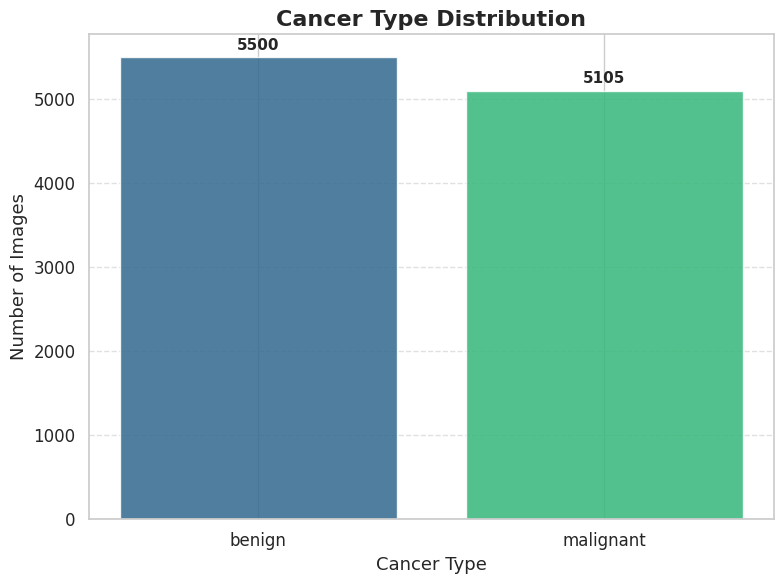

In [13]:
# Plot class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Count images per class
label_counts = df['label'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax = plt.bar(label_counts.index, label_counts.values, color=colors, alpha=0.85)

# Add count labels above bars
for i, v in enumerate(label_counts.values):
    plt.text(i, v + max(label_counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Axis labels and title
plt.title("Cancer Type Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Cancer Type", fontsize=13)
plt.ylabel("Number of Images", fontsize=13)

# Styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

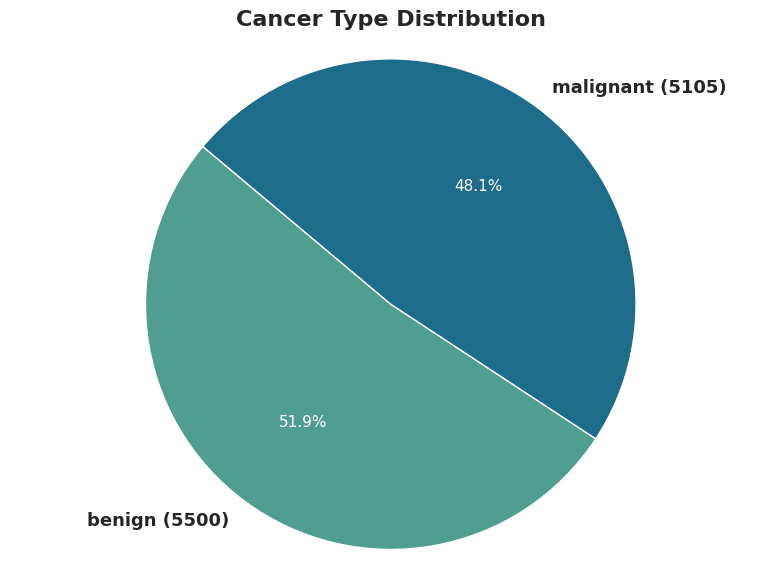

In [14]:
# Pie chart of class distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count labels
label_counts = df['label'].value_counts()

# Format labels with class name and count
labels = [f'{label} ({count})' for label, count in zip(label_counts.index, label_counts.values)]

# Plot pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    label_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("crest", len(label_counts)),
    textprops={'fontsize': 12}
)

# Label styling
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

# Final formatting
plt.title("Cancer Type Distribution", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


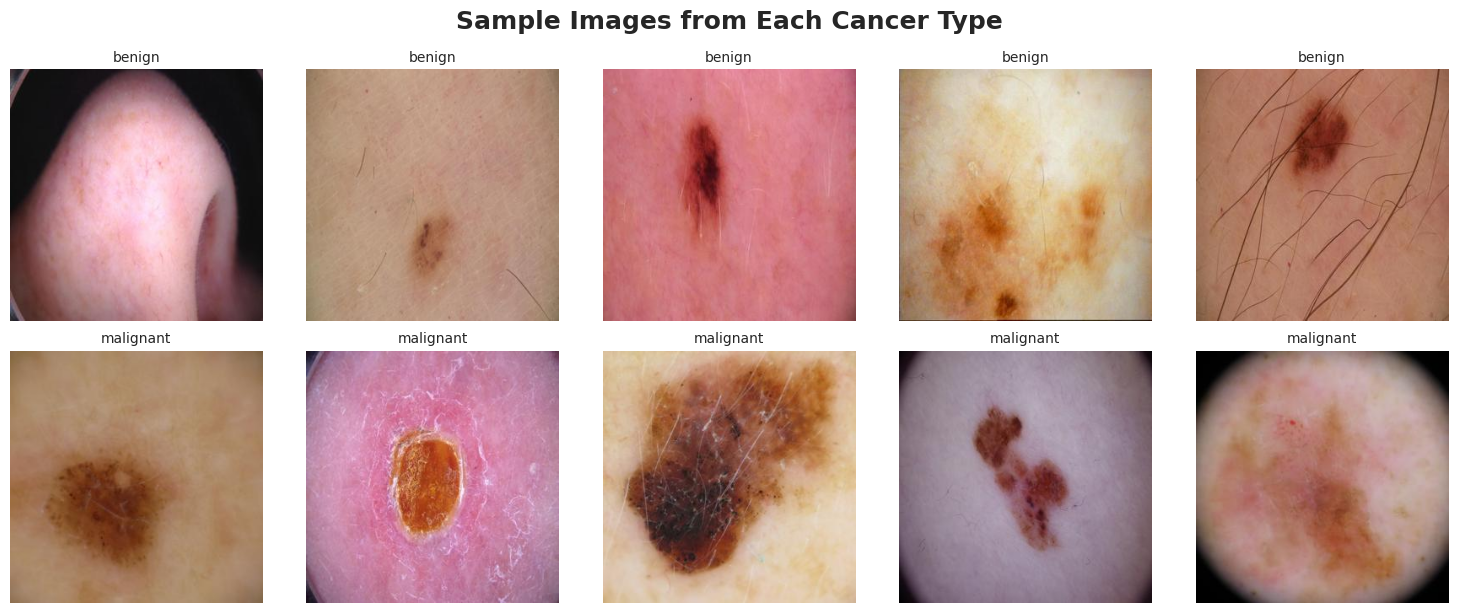

In [15]:
# Display sample images per class
import matplotlib.pyplot as plt
import cv2

num_images = 5  # Images to show per category

plt.figure(figsize=(num_images * 3, len(categories) * 3))
plt.suptitle("Sample Images from Each Cancer Type", fontsize=18, fontweight='bold', y=1.02)

# Loop through each class and display sample images
for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt_idx = i * num_images + j + 1
        plt.subplot(len(categories), num_images, plt_idx)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


# **3.   Pre Proccessing**



## Label Encoding

In [16]:
# Encode class labels as integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [17]:
# Keep only image paths and encoded labels
df = df[['image_path', 'category_encoded']]

In [18]:
# Show class-to-encoding mapping
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Encoding Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Encoding Mapping:
benign: 0
malignant: 1


## Sampling


In [19]:
pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Apply random oversampling to balance classes
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

# Create resampled DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [21]:
# Check class distribution after oversampling
print("\nClass distribution after oversampling:")
df_resampled['category_encoded'].value_counts()


Class distribution after oversampling:


category_encoded
0    5500
1    5500
Name: count, dtype: int64

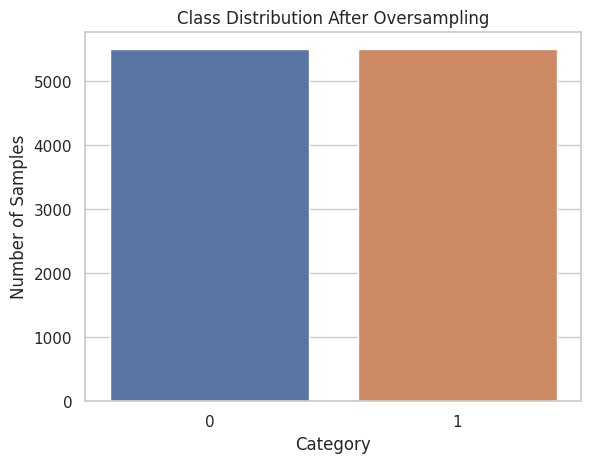

In [22]:
# Visualize class distribution after oversampling
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_resampled['category_encoded'])
plt.title("Class Distribution After Oversampling")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.show()


In [23]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/melanoma_cancer_dataset/train/be...,0
1,/kaggle/input/melanoma_cancer_dataset/train/be...,0
2,/kaggle/input/melanoma_cancer_dataset/train/be...,0
3,/kaggle/input/melanoma_cancer_dataset/train/be...,0
4,/kaggle/input/melanoma_cancer_dataset/train/be...,0
...,...,...
10995,/kaggle/input/melanoma_cancer_dataset/train/ma...,1
10996,/kaggle/input/melanoma_cancer_dataset/train/ma...,1
10997,/kaggle/input/melanoma_cancer_dataset/test/mal...,1
10998,/kaggle/input/melanoma_cancer_dataset/train/ma...,1


## Train-Test Split

In [24]:
# Standard libraries
import time
import shutil
import pathlib
import itertools
import warnings

# Image handling
import cv2
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Data handling and evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Deep learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Activation, Dropout, BatchNormalization)
from tensorflow.keras import regularizers

# Suppress unnecessary warnings
warnings.filterwarnings("ignore")

print("✅ Setup complete.")


✅ Setup complete.


In [25]:
# Convert labels to string for compatibility with ImageDataGenerator
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [26]:
# Split into 80% train and 20% temp (for validation/test), with stratified sampling
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)
"""
# Sample 20% of training data for quicker testing
train_df_new = train_df_new.sample(frac=0.2, random_state=42).reset_index(drop=True)
"""
# Split remaining 20% into validation and test sets (10% each)
valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)


In [27]:
print("Train set size:", len(train_df_new))
print("Validation set size:", len(valid_df_new))
print("Test set size:", len(test_df_new))

Train set size: 8800
Validation set size: 1100
Test set size: 1100


## Image Data Genarator

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Train
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Val/Test
test_datagen = ImageDataGenerator()

# Training generator (shuffle = True)
train_gen_new = train_datagen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    seed=42
)

# Validation generator (shuffle = False)
valid_gen_new = test_datagen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

# Test generator (shuffle = False)
test_gen_new = test_datagen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 8800 validated image filenames belonging to 2 classes.
Found 1100 validated image filenames belonging to 2 classes.
Found 1100 validated image filenames belonging to 2 classes.



# **4.   Model Training**

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, Xception
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.layers import (
    Input, Lambda, Reshape, MultiHeadAttention, GlobalAveragePooling2D,
    Dense, BatchNormalization, Activation, Dropout, Concatenate, GaussianNoise
)

def _clone_with_prefix(backbone: Model, prefix: str) -> Model:
    """Clone a model so all sublayers have a unique prefix; copy weights."""
    def _rename(layer):
        layer._name = f"{prefix}_{layer.name}"
        return layer
    cloned = clone_model(backbone, clone_function=_rename)
    cloned.set_weights(backbone.get_weights())
    cloned._name = f"{prefix}_{backbone.name}"
    return cloned

def create_vgg19_xception_hybrid(input_shape):
    inputs = Input(shape=input_shape, name="shared_input")

    # ===== VGG19 branch =====
    vgg_input = Lambda(vgg_preprocess, name="vgg_preprocess")(inputs)
    vgg_base_raw = VGG19(weights='imagenet', include_top=False)  # no input_tensor
    vgg_base = _clone_with_prefix(vgg_base_raw, "vgg")           # unique names
    for l in vgg_base.layers:
        l.trainable = False
    vgg_feat = vgg_base(vgg_input)
    H_v, W_v, C_v = int(vgg_feat.shape[1]), int(vgg_feat.shape[2]), int(vgg_feat.shape[3])
    vgg_tokens = Reshape((H_v * W_v, C_v), name="vgg_tokens")(vgg_feat)
    vgg_attn   = MultiHeadAttention(num_heads=8, key_dim=64, output_shape=C_v, name="vgg_mha")(vgg_tokens, vgg_tokens)
    vgg_attn   = Reshape((H_v, W_v, C_v), name="vgg_attn_reshaped")(vgg_attn)
    vgg_attn   = GaussianNoise(0.25, name="vgg_noise")(vgg_attn)
    vgg_vec    = GlobalAveragePooling2D(name="vgg_gap")(vgg_attn)
    vgg_vec    = Dense(512, use_bias=False, name="vgg_fc")(vgg_vec)
    vgg_vec    = BatchNormalization(name="vgg_bn")(vgg_vec)
    vgg_vec    = Activation('relu', name="vgg_relu")(vgg_vec)

    # ===== Xception branch =====
    xcp_input = Lambda(xception_preprocess, name="xception_preprocess")(inputs)
    xcp_base_raw = Xception(weights='imagenet', include_top=False)  # no input_tensor
    xcp_base = _clone_with_prefix(xcp_base_raw, "xcp")              # unique names
    for l in xcp_base.layers:
        l.trainable = False
    xcp_feat = xcp_base(xcp_input)
    H_x, W_x, C_x = int(xcp_feat.shape[1]), int(xcp_feat.shape[2]), int(xcp_feat.shape[3])
    xcp_tokens = Reshape((H_x * W_x, C_x), name="xcp_tokens")(xcp_feat)
    xcp_attn   = MultiHeadAttention(num_heads=8, key_dim=64, output_shape=C_x, name="xcp_mha")(xcp_tokens, xcp_tokens)
    xcp_attn   = Reshape((H_x, W_x, C_x), name="xcp_attn_reshaped")(xcp_attn)
    xcp_attn   = GaussianNoise(0.25, name="xcp_noise")(xcp_attn)
    xcp_vec    = GlobalAveragePooling2D(name="xcp_gap")(xcp_attn)
    xcp_vec    = Dense(512, use_bias=False, name="xcp_fc")(xcp_vec)
    xcp_vec    = BatchNormalization(name="xcp_bn")(xcp_vec)
    xcp_vec    = Activation('relu', name="xcp_relu")(xcp_vec)

    # ===== Fusion & head =====
    combined = Concatenate(name="feature_concat")([vgg_vec, xcp_vec])
    combined = GaussianNoise(0.25, name="fusion_noise")(combined)
    combined = Dense(256, use_bias=False, name="fusion_fc")(combined)
    combined = BatchNormalization(name="fusion_bn")(combined)
    combined = Activation('relu', name="fusion_relu")(combined)
    combined = Dropout(0.25, name="fusion_dropout")(combined)

    outputs  = Dense(2, activation='softmax', name="pred")(combined)
    model    = Model(inputs, outputs, name="vgg19_xception_hybrid")

    # Attach cloned backbones for Phase-2 fine-tuning
    model._backbones = {"vgg19": vgg_base, "xception": xcp_base}
    return model


In [31]:
# ===========================
# Universal Unfreezer that uses attached _backbones
# ===========================
def unfreeze_backbones_universal(model, n=30, keep_bn_frozen=True, show_layers=True):
    """
    Unfreezes the last `n` layers of each attached backbone (model._backbones).
    Prints which layers were unfrozen and how many remain frozen.

    Args:
        model: Keras Model built by create_resnet50_mobilenetv2_hybrid (or similar),
               with model._backbones = {"name": backbone_model, ...}
        n (int): number of trailing layers in each backbone to unfreeze
        keep_bn_frozen (bool): if True, leaves BatchNormalization layers frozen
        show_layers (bool): if True, prints each unfrozen layer name
    """
    from tensorflow.keras.layers import BatchNormalization

    if not hasattr(model, "_backbones") or not isinstance(model._backbones, dict) or not model._backbones:
        print("⚠️ No attached backbones found on model. "
              "Attach them via `model._backbones = {...}` inside your builder.")
        return

    for name, backbone in model._backbones.items():
        if backbone is None:
            print(f"⚠️ {name}: backbone is None")
            continue

        total_layers = len(backbone.layers)
        unfrozen = []
        # Unfreeze last n
        for sub_layer in backbone.layers[-n:]:
            if keep_bn_frozen and isinstance(sub_layer, BatchNormalization):
                continue
            sub_layer.trainable = True
            unfrozen.append(sub_layer.name)

        frozen_count = sum(not l.trainable for l in backbone.layers)
        print(f"✅ {name}: unfroze {len(unfrozen)} / last {n} layers | still frozen: {frozen_count} / {total_layers}")
        if show_layers and unfrozen:
            for lname in unfrozen:
                print(f"    - {lname}")


In [32]:
# Input shape for ResNet50
#input_shape = (128, 128, 3)              # ⚡ Fast testing shape
input_shape = (224, 224, 3)            # ✅ Recommended for final training

# Build the model with ResNet50 base (frozen weights)
cnn_model = create_vgg19_xception_hybrid(input_shape)

# Show model architecture
cnn_model.summary()


I0000 00:00:1755696079.668435      96 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755696079.669106      96 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "vgg19_xception_hybrid"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ shared_input        │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_preprocess      │ (None, 224, 224,  │          0 │ shared_input[0][… │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xception_preprocess │ (None, 224, 224,  │          0 │ shared_input[0][… │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ vgg_preprocess[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xception            │ (None, 7, 7,      │ 20,861,480 │ xception_preproc… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_tokens          │ (None, 49, 512)   │          0 │ vgg19[0][0]       │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_tokens          │ (None, 49, 2048)  │          0 │ xception[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_mha             │ (None, 49, 512)   │  1,050,624 │ vgg_tokens[0][0], │
│ (MultiHeadAttentio… │                   │            │ vgg_tokens[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_mha             │ (None, 49, 2048)  │  4,197,888 │ xcp_tokens[0][0], │
│ (MultiHeadAttentio… │                   │            │ xcp_tokens[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_attn_reshaped   │ (None, 7, 7, 512) │          0 │ vgg_mha[0][0]     │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_attn_reshaped   │ (None, 7, 7,      │          0 │ xcp_mha[0][0]     │
│ (Reshape)           │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_noise           │ (None, 7, 7, 512) │          0 │ vgg_attn_reshape… │
│ (GaussianNoise)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_noise           │ (None, 7, 7,      │          0 │ xcp_attn_reshape… │
│ (GaussianNoise)     │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_gap             │ (None, 512)       │          0 │ vgg_noise[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_gap             │ (None, 2048)      │          0 │ xcp_noise[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_fc (Dense)      │ (None, 512)       │    262,144 │ vgg_gap[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xcp_fc (Dense)      │ (None, 512)       │  1,048,576 │ xcp_gap[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_bn              │ (None, 512)       │      2,048 │ vgg_fc[0][0]    

 Total params: 47,712,874 (182.01 MB)

 Trainable params: 6,824,450 (26.03 MB)

 Non-trainable params: 40,888,424 (155.98 MB)

In [33]:
# -----------------
# PHASE 1 CALLBACKS
# -----------------
early_stopping_p1 = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=8,           # large enough to let frozen backbone converge
    min_delta=1e-4,
    restore_best_weights=True,
    verbose=1,
)

reduce_lr_p1 = ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.2,
    patience=4,           
    cooldown=1,
    verbose=1,
    min_lr=5e-7,
)

# Path to save Phase 1 best weights
phase1_best_weights_path = "/kaggle/working/phase1_best.weights.h5"

# Callback to save best model based on val_loss
checkpoint_p1 = ModelCheckpoint(
    phase1_best_weights_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [34]:
# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=1e-4),      # Adam optimizer with low learning rate
    loss='categorical_crossentropy',         # For multi-class (softmax) classification
    metrics=['accuracy']
)

In [35]:
import time

# Phase 1: Train only the custom top layers
start_time = time.time()

history_phase1 = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=50,
    callbacks=[early_stopping_p1, reduce_lr_p1, checkpoint_p1],
    verbose=1
)

end_time = time.time()
print(f"\n⏱ Phase 1 training time: {(end_time - start_time)/60:.2f} minutes")



Epoch 1/50


I0000 00:00:1755696097.794033     155 service.cc:148] XLA service 0x7da0fc002a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755696097.795340     155 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755696097.795362     155 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755696099.434082     155 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1755696121.349677     155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.8433 - loss: 0.3738
Epoch 1: val_loss improved from inf to 0.21505, saving model to /kaggle/working/phase1_best.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 214s 647ms/step - accuracy: 0.8434 - loss: 0.3736 - val_accuracy: 0.9318 - val_loss: 0.2151 - learning_rate: 1.0000e-04
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9096 - loss: 0.2391
Epoch 2: val_loss did not improve from 0.21505
275/275 ━━━━━━━━━━━━━━━━━━━━ 118s 427ms/step - accuracy: 0.9095 - loss: 0.2391 - val_accuracy: 0.9191 - val_loss: 0.2241 - learning_rate: 1.0000e-04
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.9207 - loss: 0.2009
Epoch 3: val_loss improved from 0.21505 to 0.19444, saving model to /kaggle/working/phase1_best.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 116s 422ms/step - accuracy: 0.9207 - loss: 0.2009 - val_accuracy: 0.9255 - val_loss: 0.1944 - learning_rate: 1.0000e-04
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [36]:
# ---- Find best epoch by validation accuracy ----
val_accuracies = history_phase1.history['val_accuracy']
best_epoch_idx = np.argmax(val_accuracies)  
best_epoch_num = best_epoch_idx + 1         

print(f"\n🏆 Best Epoch: {best_epoch_num}")

# ---- Print all metrics from that epoch ----
for metric_name, values in history_phase1.history.items():
    print(f"{metric_name}: {values[best_epoch_idx]:.4f}")


🏆 Best Epoch: 12
accuracy: 0.9567
loss: 0.1094
val_accuracy: 0.9518
val_loss: 0.1405
learning_rate: 0.0000


In [37]:
# -----------------
# PHASE 2 CALLBACKS
# -----------------
early_stopping_p2 = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,           # tighter to avoid overfitting in fine-tune
    min_delta=1e-4,
    restore_best_weights=True,
    verbose=1,
)

reduce_lr_p2 = ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.5,           # smaller drop, since LR is already low
    patience=3,           # quicker reaction
    cooldown=1,
    verbose=1,
    min_lr=5e-7,
)

# Save best Phase-2 weights (Kaggle-friendly path)
phase2_best_weights_path = "/kaggle/working/phase2_best.weights.h5"
checkpoint_p2 = ModelCheckpoint(
    filepath=phase2_best_weights_path,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
)

# full model for easy reuse
phase2_best_model_path = "/kaggle/working/phase2_best_model.keras"
checkpoint_p2_full = ModelCheckpoint(
    filepath=phase2_best_model_path,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    save_weights_only=False,
    verbose=1,
)


In [38]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.losses import CategoricalCrossentropy

#  Restore Phase-1 best weights 
cnn_model.load_weights(phase1_best_weights_path)

# ===== Phase 2: Fine-tuning =====
# Unfreeze a small tail from each backbone
unfreeze_backbones_universal(cnn_model, n=10, keep_bn_frozen=True, show_layers=True)

# ✅ Recompile with a fresh optimizer/schedule after unfreezing
steps_per_epoch = 275
lr_schedule = CosineDecay(initial_learning_rate=3e-5, decay_steps=steps_per_epoch * 8)

cnn_model.compile(
    optimizer=AdamW(learning_rate=lr_schedule, weight_decay=1e-5, clipnorm=1.0),
    loss=CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy']
)

✅ vgg19: unfroze 10 / last 10 layers | still frozen: 12 / 22
    - block4_conv1
    - block4_conv2
    - block4_conv3
    - block4_conv4
    - block4_pool
    - block5_conv1
    - block5_conv2
    - block5_conv3
    - block5_conv4
    - block5_pool
✅ xception: unfroze 7 / last 10 layers | still frozen: 125 / 132
    - conv2d_3
    - block13_pool
    - add_11
    - block14_sepconv1
    - block14_sepconv1_act
    - block14_sepconv2
    - block14_sepconv2_act


In [39]:
import time

# Phase 2: Fine-tune
start_time = time.time()

history_phase2 = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=50,
    callbacks=[early_stopping_p2, checkpoint_p2],
    verbose=1
)

end_time = time.time()
print(f"\n⏱ Phase 2 training time: {(end_time - start_time)/60:.2f} minutes")

Epoch 1/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9165 - loss: 0.3238
Epoch 1: val_loss improved from inf to 0.27429, saving model to /kaggle/working/phase2_best.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 192s 553ms/step - accuracy: 0.9165 - loss: 0.3237 - val_accuracy: 0.9318 - val_loss: 0.2743
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9374 - loss: 0.2568
Epoch 2: val_loss improved from 0.27429 to 0.26608, saving model to /kaggle/working/phase2_best.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 147s 533ms/step - accuracy: 0.9374 - loss: 0.2568 - val_accuracy: 0.9318 - val_loss: 0.2661
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9413 - loss: 0.2447
Epoch 3: val_loss improved from 0.26608 to 0.26147, saving model to /kaggle/working/phase2_best.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 147s 532ms/step - accuracy: 0.9413 - loss: 0.2447 - val_accuracy: 0.9282 - val_loss: 0.2615
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - 

In [40]:
# Best epoch by validation accuracy
val_accuracies = history_phase2.history['val_accuracy']
best_epoch_idx = np.argmax(val_accuracies)
best_epoch_num = best_epoch_idx + 1

print(f"\n🏆 Best Epoch (Phase 2): {best_epoch_num}")
for metric_name, values in history_phase2.history.items():
    print(f"{metric_name}: {values[best_epoch_idx]:.4f}")


🏆 Best Epoch (Phase 2): 12
accuracy: 0.9699
loss: 0.1915
val_accuracy: 0.9491
val_loss: 0.2324


# **5.   Model Evaluation**






## Accuracy - Loss per Epoch

In [41]:
# Plot training and validation accuracy/loss curves
def plot_training_curves(history, title='Training History'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Train Acc')
    plt.plot(epochs, val_acc, 'ro-', label='Val Acc')
    plt.title('Accuracy', fontsize=13)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Train Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Val Loss')
    plt.title('Loss', fontsize=13)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()

    plt.suptitle(title, fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()


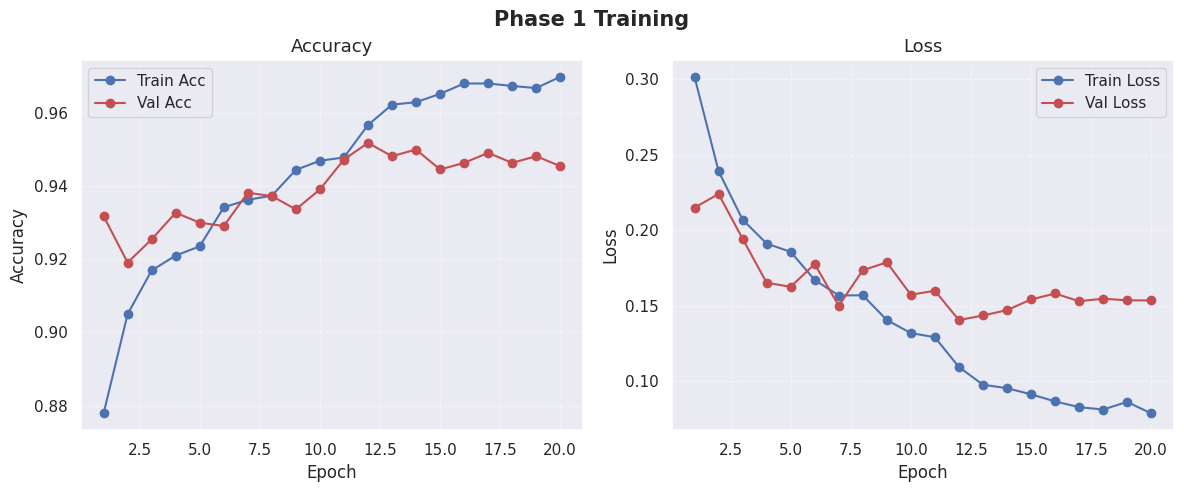

In [42]:
plot_training_curves(history_phase1, title='Phase 1 Training')

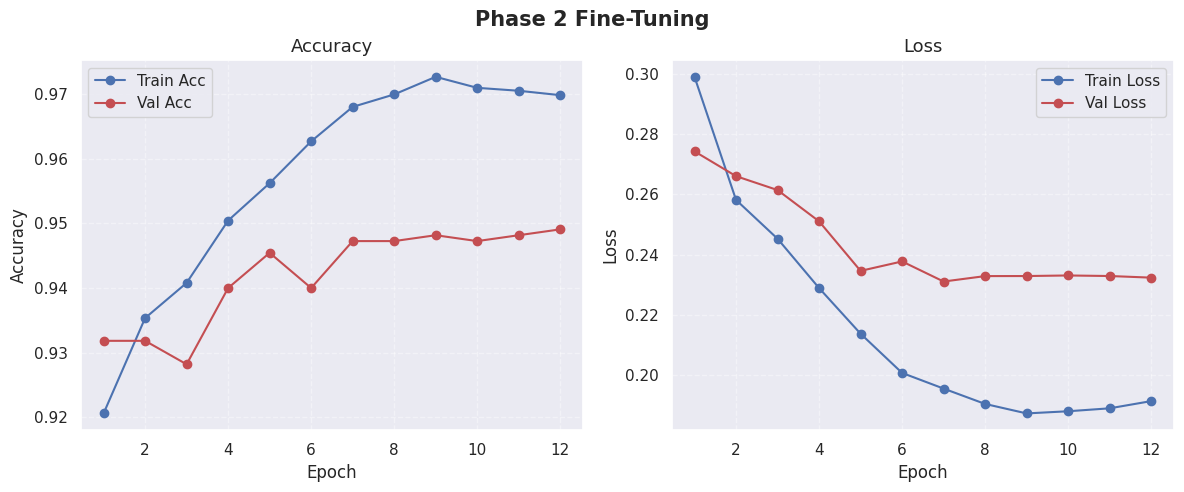

In [43]:
plot_training_curves(history_phase2, title='Phase 2 Fine-Tuning')

## Classification Report

In [44]:
# Get ground truth and predictions
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)


In [45]:
# Print text classification report with 4 decimal places
report = classification_report(
    test_labels,
    predicted_classes,
    target_names=list(test_gen_new.class_indices.keys()),
    digits=4
)
print(report)

              precision    recall  f1-score   support

           0     0.9108    0.9655    0.9373       550
           1     0.9632    0.9055    0.9335       550

    accuracy                         0.9355      1100
   macro avg     0.9370    0.9355    0.9354      1100
weighted avg     0.9370    0.9355    0.9354      1100



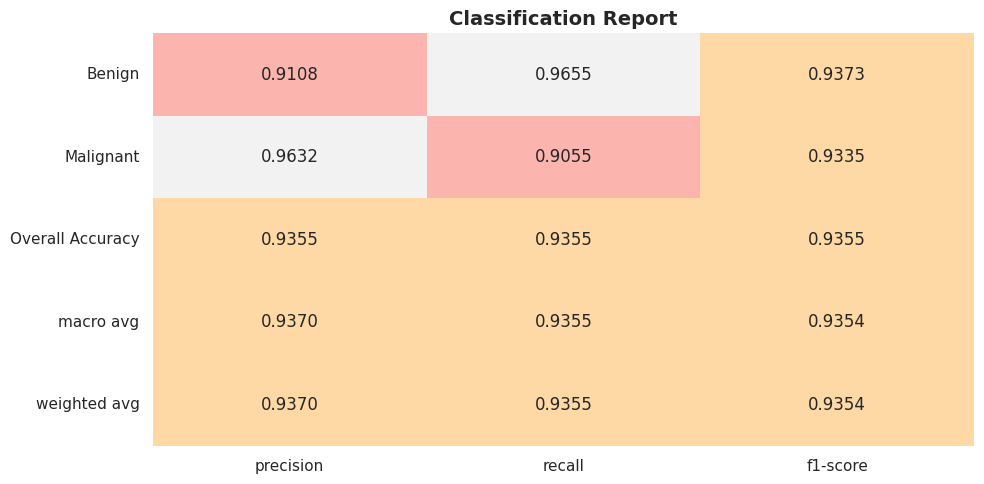

In [46]:
# Define readable class labels
class_names = ['Benign', 'Malignant']

# Generate classification report as a dictionary
report_dict = classification_report(
    test_labels,
    predicted_classes,
    labels=[0, 1],
    target_names=class_names,
    output_dict=True
)

# Convert to DataFrame and round values to 4 decimals
report_df = pd.DataFrame(report_dict).transpose().round(4)

# Rename 'accuracy' row for readability
report_df.rename(index={'accuracy': 'Overall Accuracy'}, inplace=True)

# Plot classification metrics (excluding 'support' column)
plt.figure(figsize=(10, 5))
sns.heatmap(
    report_df.drop(columns='support', errors='ignore'),
    annot=True, fmt=".4f", cmap="Pastel1", cbar=False
)

plt.title("Classification Report", fontsize=14, fontweight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Confusion Matrix


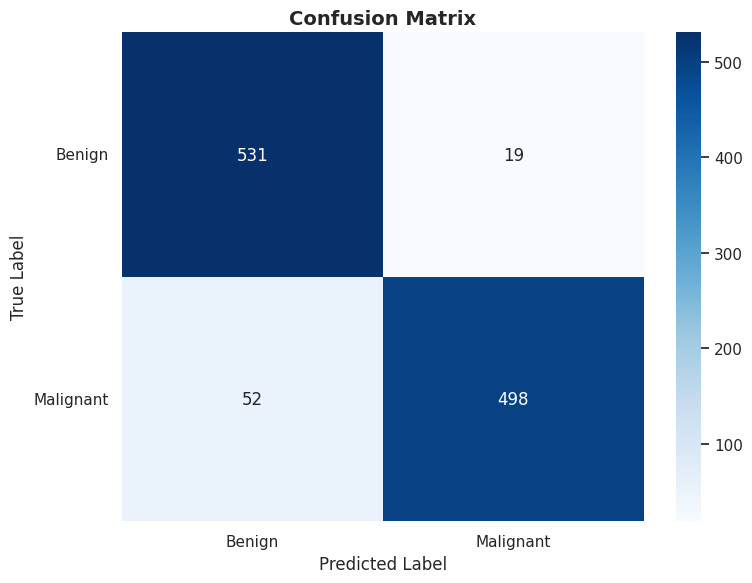

In [47]:
# Define consistent class names
class_names = ['Benign', 'Malignant']

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes, labels=[0, 1])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ROC Curve

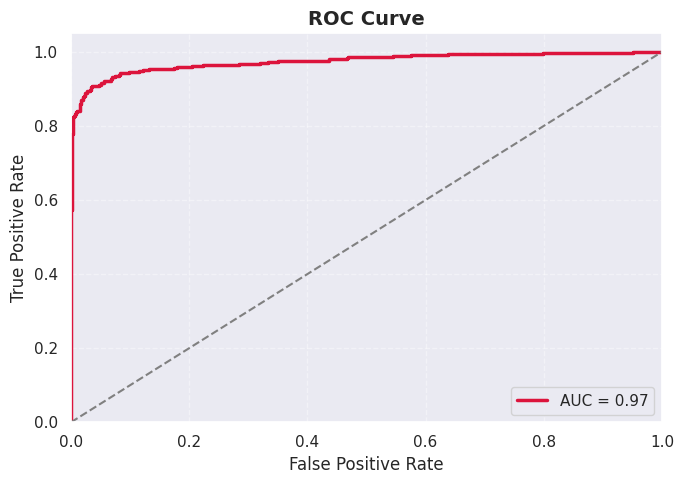

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (Malignant)
y_pred_prob = predictions[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='crimson', lw=2.5, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Explainable AI (GRAD CAM++ and Score CAM)

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Conv2D, SeparableConv2D, DepthwiseConv2D

# ===========================
# ✅ Config
# ===========================
class_names = ['Benign', 'Malignant']  # adjust if needed

# ===========================
# 📌 Image loading 
# ===========================
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img.astype(np.float32), axis=0)  # model handles preprocess internally
    return img

# ===========================
# 📌 Find last conv layer (Conv2D / SepConv2D / DepthwiseConv2D)
# Optionally prefer a layer by name (tuple/list), else auto-detect
# ===========================
def get_last_conv_layer_name(model, prefer=None):
    if prefer:
        if isinstance(prefer, (tuple, list)):
            for name in prefer:
                try:
                    layer = model.get_layer(name)
                    if isinstance(layer, (Conv2D, SeparableConv2D, DepthwiseConv2D)):
                        return layer.name
                except ValueError:
                    pass
        else:
            try:
                layer = model.get_layer(prefer)
                if isinstance(layer, (Conv2D, SeparableConv2D, DepthwiseConv2D)):
                    return layer.name
            except ValueError:
                pass
    # Fallback: scan from the end
    for layer in reversed(model.layers):
        if isinstance(layer, (Conv2D, SeparableConv2D, DepthwiseConv2D)):
            return layer.name
    raise ValueError("No Conv2D/SeparableConv2D/DepthwiseConv2D layer found.")

# ===========================
# 🔥 Grad-CAM++
# ===========================
def gradcam_pp(img_array, model, layer_name, class_index=None, eps=1e-8):
    conv_layer = model.get_layer(layer_name)
    grad_model = tf.keras.models.Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_out, preds = grad_model(img_array, training=False)
        if class_index is None:
            class_index = tf.argmax(preds[0])
        loss = preds[:, class_index]

    grads = tape.gradient(loss, conv_out)                             # dY/dA
    conv_out = conv_out[0]                                            # (H, W, C)
    grads = grads[0]                                                  # (H, W, C)

    # Grad-CAM++ weights
    grads2 = tf.square(grads)
    grads3 = grads2 * grads

    # Sum over spatial dims
    sum_grads2 = tf.reduce_sum(grads2, axis=[0,1])                    # (C,)
    sum_grads3 = tf.reduce_sum(grads3, axis=[0,1])                    # (C,)

    # Per paper: alpha^kc = grads^2 / (2*grads^2 + A * grads^3)
    # Compute denominator per channel with spatially weighted term
    # Expand to (H, W, C) for broadcasting
    denom = 2.0 * grads2 + conv_out * grads3
    denom = tf.where(denom == 0.0, tf.ones_like(denom) * eps, denom)
    alpha = grads2 / denom                                            # (H, W, C)

    # Weights: sum over spatial alpha * ReLU(grads)
    relu_grads = tf.nn.relu(grads)
    weights = tf.reduce_sum(alpha * relu_grads, axis=[0,1])           # (C,)

    # Heatmap = ReLU( sum_k w_k * A_k )
    cam = tf.reduce_sum(weights * conv_out, axis=-1)                  # (H, W)
    cam = tf.nn.relu(cam)

    # Normalize to [0,1]
    cam -= tf.reduce_min(cam)
    denom_cam = tf.reduce_max(cam) + eps
    cam /= denom_cam
    return cam.numpy()

# ===========================
# ⚡ Score-CAM (fast, top_k channels)
# ===========================
def score_cam(img_array, model, layer_name, class_index=None, top_k=64, eps=1e-8):
    conv_layer = model.get_layer(layer_name)
    inter_model = tf.keras.models.Model([model.inputs], [conv_layer.output, model.output])
    conv_out, preds = inter_model(img_array, training=False)          # conv_out: (1, H, W, C)
    H, W, C = conv_out.shape[1:4]

    if class_index is None:
        class_index = int(tf.argmax(preds[0]).numpy())

    # Select top_k channels by global activation energy to save time
    act = conv_out[0]                                                 # (H, W, C)
    channel_energy = tf.reduce_mean(tf.abs(act), axis=[0,1]).numpy()  # (C,)
    top_idx = np.argsort(channel_energy)[-top_k:]

    # Prepare resized maps to input resolution
    input_h, input_w = int(img_array.shape[1]), int(img_array.shape[2])

    weights = []
    maps = []
    for c in top_idx:
        amap = act[..., c].numpy()
        amap = cv2.resize(amap, (input_w, input_h))
        # Normalize to [0,1]
        a_min, a_max = amap.min(), amap.max()
        if a_max - a_min < eps:
            continue
        amap = (amap - a_min) / (a_max - a_min)
        maps.append(amap)

        # Mask the original input (broadcast across 3 channels)
        masked = img_array.copy()
        masked[0, ..., 0] *= amap
        masked[0, ..., 1] *= amap
        masked[0, ..., 2] *= amap

        # Forward pass to get score for the class
        score = model.predict(masked, verbose=0)[0, class_index]
        weights.append(max(0.0, float(score)))  # ReLU on score

    if len(weights) == 0:
        # Fallback: all-zero map if nothing usable
        return np.zeros((input_h, input_w), dtype=np.float32)

    weights = np.array(weights, dtype=np.float32)
    maps = np.array(maps, dtype=np.float32)

    # Weighted sum of maps
    cam = np.tensordot(weights, maps, axes=(0, 0))  # (H, W)
    cam = np.maximum(cam, 0)

    # Normalize to [0,1]
    cam -= cam.min()
    denom_cam = cam.max() + eps
    cam /= denom_cam
    return cam

# ===========================
# 🎨 Overlay utility
# ===========================
def overlay_heatmap_on_image(img_path, heatmap, alpha=0.45):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    hm = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    hm = np.uint8(255 * hm)
    hm = cv2.cvtColor(cv2.applyColorMap(hm, cv2.COLORMAP_JET), cv2.COLOR_BGR2RGB)  # ✅ RGB
    blended = cv2.addWeighted(hm, alpha, img, 1 - alpha, 0)
    return img, blended


# ===========================
# 🚀 Runner: Original | Grad-CAM++ | Score-CAM (side-by-side)
# ===========================
def run_cam(img_path, model, class_names,
            prefer_gpp=None,         # e.g., ("block_16_project","Conv_1")
            prefer_sc=None,          # e.g., ("conv5_block3_2_conv","Conv_1")
            top_k=64, alpha=0.45):
    input_size = tuple(model.input.shape[1:3])
    x = get_img_array(img_path, size=input_size)

    # Prediction
    preds = model.predict(x, verbose=0)
    pred_idx = int(np.argmax(preds[0]))
    conf = float(preds[0][pred_idx])
    pred_label = class_names[pred_idx]

    # True label (your convention)
    true_idx = test_df_new.loc[
        test_df_new['image_path'] == img_path, 'category_encoded'
    ].values[0]
    true_label = class_names[int(true_idx)]

    # Pick separate layers for G++ and SC
    gpp_layer = get_last_conv_layer_name(model, prefer=prefer_gpp)
    sc_layer  = get_last_conv_layer_name(model, prefer=prefer_sc)

    print(f"\n📷 Image: {img_path}")
    print(f"🔹 Grad-CAM++ layer: {gpp_layer}  |  🔸 Score-CAM layer: {sc_layer}")
    print(f"✅ Predicted: {pred_label} ({conf*100:.2f}%)  |  🎯 True: {true_label}")

    # Generate maps (using predicted class; switch to true_idx if you prefer)
    gpp = gradcam_pp(x, model, gpp_layer, class_index=pred_idx)
    sc  = score_cam(x, model, sc_layer,  class_index=pred_idx, top_k=top_k)

    # Overlays
    orig, gpp_vis = overlay_heatmap_on_image(img_path, gpp, alpha=alpha)
    _,    sc_vis  = overlay_heatmap_on_image(img_path, sc,  alpha=alpha)

    # Plot side-by-side
    fig, axs = plt.subplots(1, 3, figsize=(13, 5))
    axs[0].imshow(orig);    axs[0].set_title("Original");                 axs[0].axis('off')
    axs[1].imshow(gpp_vis); axs[1].set_title(f"Grad-CAM++ ({gpp_layer})");axs[1].axis('off')
    axs[2].imshow(sc_vis);  axs[2].set_title(f"Score-CAM ({sc_layer})");  axs[2].axis('off')
    plt.tight_layout(); plt.show()


# ===========================
# 🧪 Example: run on a few test images
# ===========================
sample_images = test_df_new.sample(3, random_state=3)['image_path'].values
for p in sample_images:
    run_cam(
        p, cnn_model, class_names,
        prefer_gpp=("Conv_1", "Conv_1"),     # Grad-CAM++ layer(s)
        prefer_sc =("conv5_block3_2_conv", "Conv_1"),  # Score-CAM layer(s)
        top_k=64, alpha=0.45
    )



ValueError: No Conv2D/SeparableConv2D/DepthwiseConv2D layer found.